# Tokenization and Word Counts

Word tokenization and counts are basic components of text analysis. You've likely seen word clouds that visualize the most common words in a corpus or document. Common words, it's reasonably argued, are significant indications that reflect the core ideas or themes about language.

This notebook introduces some of these basic functions. We'll use the library, scikit-learn (sklearn), which offers many functions that can be used for machine learning and text analysis. We'll also change the shape of matrices and dataframes so that we can work across different structures of data.

### Goals
1. Introduce sklearn for word counts.
2. Reshape data from matrices (wide-format) to dataframes (long-format) in order to rejoin data and metadata
3. Adjust visualizations to better convey information

In [1]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import CountVectorizer

abs_dir = "/Users/williamquinn/Desktop/DH/Python/Teaching/Python-Notebooks/"

# The warning below warns users that the stop_words package as deprecated. We can still use it, though.

//anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
data = pd.read_csv(abs_dir + "data/dataframe.csv",
                   sep = ",")

data['ID'] = data.index

print (data.shape, '\n', data['veracity'].value_counts())
data.head()

(57887, 7) 
 fake    36470
real    21417
Name: veracity, dtype: int64


,title,text,subject,date,veracity,dataset,ID
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,2017-12-31,real,0,0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,2017-12-29,real,0,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,2017-12-31,real,0,2
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,2017-12-30,real,0,3
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,2017-12-29,real,0,4


The first step is to counting words (tokenization) is to break up the text field into distinct words. At the moment, each row in the texts fields contains a single string.

Before we tokenize the text, we need to think carefully how we want our dataframe to look like afterward. What meta-data do we want to keep and will that be computationally expensive? By computationally expensive, I mean will our resulting dataframe strain the available memory of the computer? For example, will we create a new row for each unique word that appears in each text? We already have ~45,000 rows.

### Aside: Memory-Usage Tracking

Considering what your hardware is capable of is important. Whenever I run code that I worry might slow down my computer, I use the Acitivity Monitor (Task Manager on PC). You should be able to access your Activity Monitor in the Utilities Folder in Applications (Applications/Utilities/Activity Monitor). You can then chose the "Memory" tab, which shows which applications are taking up the most memory.

![image of activity monitor](images/activity-monitor.png)

I have highlighted python3.7, which is the memory that our program is using. At the moment, it's using 257 MB (megabytes)—that's perfectly fine. The laptop that I'm using is a reliable store-bought MacBook Air (with 8 GB of RAM). With that in mind, I tend to abort Python scripts that take up more than 5 GB of memory.

You'll notice a new line of code below: 
```python
%%time
```
This time command, one of Jupyter Notebook's built in "magic commands," can be a very helpful way to time how long a cell takes to complete. Wall time is the time to pay attention to and tells how long the cell took to finish. When running code that takes longer, this can be a nice sanity check and help you anticipate how longer the code should run.


## Word Counts with sklearn's CountVectorizer

"Convert a collection of text documents to a matrix of token counts"

Term-document matrix: each column is a term (or word) and each row is a document. We can know how many times a word appears in a document by looking up that document's row position and the term position (column).

Frequently refered to as a bag-of-words model because word order is erased.

Explanation of CountVectorizer: https://kavita-ganesan.com/how-to-use-countvectorizer/

In [4]:
%%time

# First, we'll create a variable for our vectorizer (our counter)
count_vec = CountVectorizer(stop_words="english",
                            min_df = 0.05)

# Next, we want to create a matrix of word counts with .fit_transform().
# We're going to add .astype(str) to ensure that all the text in this field is read as a string.
word_matrix = count_vec.fit_transform(data['text'].astype(str))

# We then want to transform the matrix into the dataframe format that we're familiar with.
word_df = pd.DataFrame(word_matrix.todense(), 
                       index = data['ID'], 
                       columns = count_vec.get_feature_names())

word_df.head()

CPU times: user 26.2 s, sys: 831 ms, total: 27 s
Wall time: 30 s


,000,10,100,11,12,15,20,2012,2014,2015,...,work,worked,working,world,wrong,wrote,year,years,york,young
ID,,,,,,,,,,,,,,,,,,,,,
0,0,2,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,3,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,2,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,3,0
4,0,0,0,1,0,0,0,0,1,1,...,0,0,0,1,0,1,6,0,0,0


Our dataframe is "wide" at the moment. By "wide" I mean that we have a row for each document, which is the same as our dataframe above. But, each column is a specific word. So, we have as many columns as unique words in our entire dataset. Before we change our dataframe to a more familiar form, I want to explain the arguments we used to transform our word_matrix to the word_df.

### CountVectorizer Arguments

#### stop_words = "english"

Stop words are words that occur very, very frequently and arguably don't provide much information about documents. Words like "the," "a," "this," and "those." At the very bottom of this notebook, you can review all the words in sklearn's stop words set.

Keeping or removing stop words is an interpretive choice that has repercussions in text analysis. There are reasons to keep them and reasons to remove them. Stop words, for example, can be useful for authorship attribution (determining who wrote a document). You might experiment with using stop words down the road and see if and how the results change.

#### min_df = 0.05

The min_df argument ignores words that appear infrequently. In our case, we're using a float number (0.05), which is a fraction (5%) of the dataset. An integer would indicate an absolute count. Together with stop_words, we're reducing the amount of data we're working with.

### pd.DataFrame Arguments

#### word_matrix.todense()

The first argument of pd.DataFrame() is the data that we want to turn into a dataframe. Here, we're taking our word_matrix, which was created by count_vec, and we're using .todense() to declare it as a matrix. todense() ensures that the data will be recognizable and convertible to a dataframe.

#### index = data.index

A pandas dataframe has an index to maintain relational data. Relational data, here, refers to how we read a table. When we read a dataframe, we understand that a row and column share a relationship. In our dataset, we use a row to describe a single document. A column, on the other, indicates a specific value. In other words, we read dataframes horizontally and vertically, but never diagonally.

The data.index maintains the relational (horizontal) information.

#### columns = count_vec.get_feature_names()

The "columns" argument gives a name to every column. Rather than hand-typing each word from the dataset into a column, we can retrieve unique words from the count_vec we created earlier. count_vec stores every unique word within a corpus. We can retrieve these words with the function .get_feature_names() that comes with sklearn's CountVectorizer.

The word_df is still unwieldy, though. Our next step is to change the shape of the dataframe from wide to long, a format we've been working with so far.

In [5]:
# We first need to add a column to our matrix that serves as our index.
word_df['documentID'] = word_df.index

df = word_df.melt(id_vars = ['documentID'],
                  var_name = "word", 
                  value_name = "count") \
    .query('count > 0')

### pd.melt

The pd.melt() function is a very useful tool for reshaping data structures, especially changing matrices to dataframes.

#### id_vars

id_vars is the column we want to leave unaltered, which is "documentID." The column we choose will serve as the corresponding index back to our metadata. We should have duplicate values in the "documentID"—has many values as there are unique words within that document.

#### var_name

The var_name argument will be the column name of the columns we just gathered together. In the case above, we took all our columns, except documentID, and made a vertical list under the new var_name, "word."

#### value_name

The value_name works in a similar way. We're telling the long dataframe what to name the column that will hold the word frequency. If var_name gathered the columns under a single heading, then the value_name gathers all the values of our matrix (numbers) and orders them under a single column.

pd.melt can be a confusing function. Imagining how dataframes can be reshaped, and knowing which columns stay the same, takes awhile to get used to. If you're able to get a good handle on pd.melt, though, you'll be able to work with very different data formats effectively.

## Rejoing Data and Metadata

With our dataframe back to a "long" format, we can rejoin the "word" and "count" data we've just created with our metadata from earlier.

In [6]:
# We'll need to rename the documentID column so that it matches our original column name, data['ID']
df = df.rename(columns  = {'documentID':'ID'})

wordCounts = pd.merge(df, data[["ID", 'veracity']],
                      on = 'ID',
                      how = 'inner') \
    .query('count > 0')

wordCounts.head()

,ID,word,count,veracity
0,10,000,1,real
1,10,100,2,real
2,10,12,1,real
3,10,able,1,real
4,10,accused,1,real


#### df, data[['ID', 'veracity']]

The first two arguments are our two dataframes that we want to merge together. We don't need all of the columns from data, so we'll use two square brackets to subset it and take only the "ID" and "veracity" columns.

#### on = "ID"

The "on" argument refers to the column that the two dataframes have in common. 

#### how = "left"

The "how" argument describes which data to keep. It's worth looking this up online for more information. But, essentially, "left" tells .merge to keep all the data from the first dataframe (df) and drop rows from the right (data) that don't have a corresponding value in the "ID" column. 

"Inner" tells pd.merge to join rows that both have the same set of "IDs." "Outer," on the other hand, joins data that isn't shared between the two dataframes and is useful for de-duplicated dataframes. 

## Most Common Words

We now have our original dataset with two new columns: "word" and "count." We can start to do some very simple text analysis with out metadata and new word counts. Let's first see if there's a difference between the top ten words in real and fake news.

In [7]:
# Let's first look at the top ten words in real news articles.
topTen = wordCounts \
    .groupby(['word', 'veracity'])['count'].sum() \
    .reset_index() \
    .sort_values(by = "count", ascending = False) \
    .groupby(['veracity']) \
    .head(10)

topTen

,word,veracity,count
1065,trump,fake,104776
900,said,real,99062
1066,trump,real,54700
899,said,fake,48639
753,people,fake,46983
188,clinton,fake,43187
795,president,fake,38372
533,just,fake,33546
589,like,fake,30871
454,hillary,fake,29982


While our table ranks the most common words in fake and real news, it's difficult to make comparisons in this format. We can instead make a simple visualization that provides a side-by-side comparison of the top-five words in each dataset.

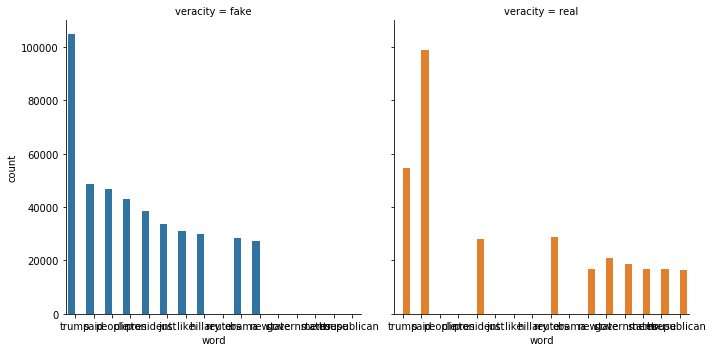

In [8]:
sns.catplot(data = topTen,
            x="word", y="count",
            hue="veracity", col="veracity",
            kind="bar")

# col = "veracity" : creates a new column for each value in "veracity"
# kind = "bar" : tells seaborn what type of chart to draw

We're starting to get a better picture of the most common words in real and fake news. But, the x-axis labels are very messy. We'll want to write those at an angle so they're more readable.

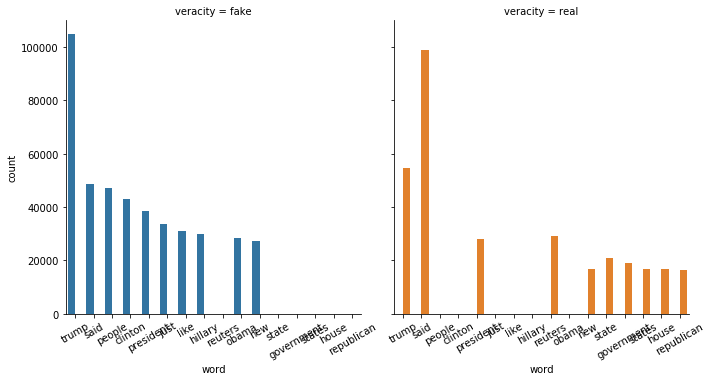

In [9]:
# We'll set a variable this time so that we can make changes.
ax = sns.catplot(data = topTen,
                 x="word", y="count",
                 hue="veracity", col="veracity",
                 kind="bar")

# Rotate the labels on x-axis
ax.set_xticklabels(rotation=30)

That's still not great. We might prefer rotating our graphs (making them horizontal) so we have more room for labels with long texts. To do this, we'll simply take our original chart and simply switch the x and y axis.

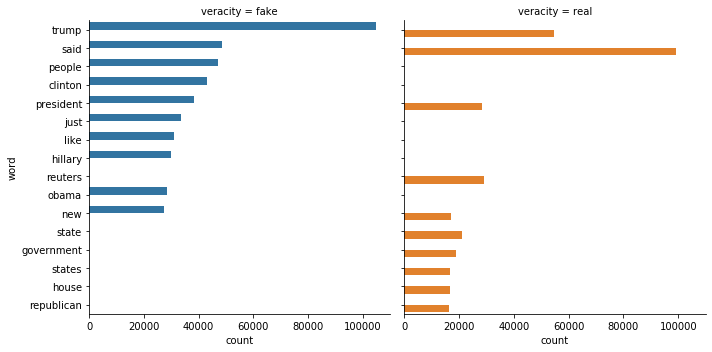

In [10]:
ax = sns.catplot(data = topTen,
                 x="count", y="word",
                 hue="veracity", col="veracity",
                 kind="bar")

That's better and we can now start to see how real and fake news within our dataset use words differently.

# Conclusion

As we can see, word tokenization and counts start to show the differences in language between real and fake news. But, word counts use raw numbers (whole integers) which introduces certain problems. Longer texts that re-use the same word will inflate the significance of that word. The language in shorter documents, on the other hand, will be underrepresented. Ultimately, word counts are not the most nuanced way to represent language computationally.

In the next notebook, we'll introduce a very common and more reliable method to account for word frequencies and their relationships to document length. This notebook, though, hopefully helps to some of the more basic functions of text analysis that you can call on in later work.

____

# Words in sklearn's stop_words list

In [11]:
print(stop_words.ENGLISH_STOP_WORDS)

frozenset({'as', 'onto', 'moreover', 'by', 'i', 'herein', 'via', 'while', 'formerly', 'they', 'noone', 'there', 'get', 'at', 'although', 'anywhere', 'own', 'off', 'take', 'over', 'top', 'everything', 'that', 'then', 'bill', 'third', 'few', 'meanwhile', 'whom', 'front', 'from', 'found', 'to', 'so', 'mill', 'until', 'part', 'three', 'other', 'most', 'become', 'with', 'thick', 'thereupon', 'whereas', 'either', 'be', 'every', 'several', 'same', 'thereby', 'been', 'seeming', 'next', 'becomes', 'else', 'latter', 'everyone', 'latterly', 'cry', 'something', 'cannot', 'mine', 'though', 'during', 'upon', 'fill', 'in', 'why', 'nevertheless', 're', 'less', 'perhaps', 'co', 'if', 'we', 'system', 'whence', 'will', 'sixty', 'me', 'therefore', 'might', 'rather', 'these', 'do', 'eight', 'herself', 'thus', 'or', 'below', 'themselves', 'any', 'inc', 'anyone', 'amoungst', 'across', 'please', 'them', 'whither', 'now', 'our', 'can', 'however', 'back', 'each', 'along', 'everywhere', 'without', 'sometimes', '